
# Project: Investigate a Dataset - [Soccer No_Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling






In [4]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')

##### Check On Some Major Information In The Dataset

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
#Check For Emptey Value Cells
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [93]:
df.loc[df.age>30].neighbourhood

0         JARDIM DA PENHA
1         JARDIM DA PENHA
2           MATA DA PRAIA
4         JARDIM DA PENHA
5               REPÚBLICA
               ...       
110521        MARIA ORTIZ
110522        MARIA ORTIZ
110523        MARIA ORTIZ
110525        MARIA ORTIZ
110526        MARIA ORTIZ
Name: neighbourhood, Length: 59575, dtype: object

In [8]:
#Check If There Is More Than Two Parameters For The No Show Column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['PatientId'].duplicated().sum()

48228

In [10]:
# We Need To Check Duplicated For Patient Id And Appointment Day As Maybe Same Patient Has More Than One Visit In 6 Months
df[['PatientId','AppointmentDay']].duplicated().sum()

8719

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df.shape


(110527, 14)


### Data Cleaning


In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [14]:
#Renaming Columns To More Usable And Clean Names
df.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','Gender':'gender','Age':'age','Neighbourhood':'neighbourhood','Scholarship':'scholarship','Hipertension':'hipertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handcap','SMS_received':'sms_received','No-show':'no_show'},inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.rename(columns={'hipertension':'hypertension'},inplace=True)

In [16]:
#Drop Duplicates
df.drop_duplicates(subset=['patient_id','appointment_day'],inplace=True)

In [17]:
#Drop Unused Columns
df.drop(columns=['patient_id','appointment_id'],inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#Converting Scheduled & Appointment Days To Datetime Formats
df.scheduled_day=pd.to_datetime(df.scheduled_day)
df.appointment_day=pd.to_datetime(df.appointment_day)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#Adding A Column To Show The Days Differneces Between Scheduled And Appointment Day
df['diff']=df.appointment_day.dt.date- df.scheduled_day.dt.date

In [20]:
#Casual Investing For The Data
df.groupby(['no_show','hypertension'])['hypertension'].count()\
,df.groupby(['no_show','diabetes'])['diabetes'].count()\
,df.groupby(['no_show','handcap'])['handcap'].count()\
,df.groupby(['no_show','alcoholism'])['alcoholism'].count()    




(no_show  hypertension
 No       0               64648
          1               16736
 Yes      0               16972
          1                3452
 Name: hypertension, dtype: int64,
 no_show  diabetes
 No       0           75306
          1            6078
 Yes      0           19114
          1            1310
 Name: diabetes, dtype: int64,
 no_show  handcap
 No       0          79717
          1           1525
          2            132
          3              8
          4              2
 Yes      0          20076
          1            311
          2             33
          3              3
          4              1
 Name: handcap, dtype: int64,
 no_show  alcoholism
 No       0             79177
          1              2207
 Yes      0             19819
          1               605
 Name: alcoholism, dtype: int64)

##### This Shows Only HyperTension Has A Remarkable Apperance As The rest Has Low Apperances in Relative To Total Number 

In [21]:
#Casual Investing For The Data
df.groupby(['no_show','scholarship'])['scholarship'].count()



no_show  scholarship
No       0              73785
         1               7599
Yes      0              18081
         1               2343
Name: scholarship, dtype: int64

In [22]:
df.age.describe()

count    101808.000000
mean         37.058915
std          23.214099
min          -1.000000
25%          18.000000
50%          37.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [23]:
df.query('age<0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,diff
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0 days


In [24]:
# Deleting Row With -1 Age
df.drop(index=df.query('age<0').index,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




## Research Question 1 (Is Age And Gender Have A big Role In The Attendance Of Patients?)

In [25]:
df.age.describe()

count    101807.000000
mean         37.059289
std          23.213906
min           0.000000
25%          18.000000
50%          37.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [26]:
df.age.mode()

0    0
Name: age, dtype: int64

In [27]:
df.gender.describe()

count     101807
unique         2
top            F
freq       66621
Name: gender, dtype: object

<AxesSubplot: title={'center': 'Top Frequent No Show Age'}, xlabel='age'>

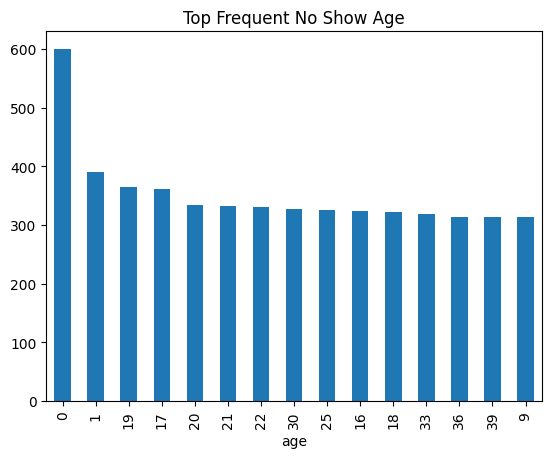

In [28]:
#Top Frequent No Show Age
df.query('no_show=="Yes"').groupby('age')['age'].count().sort_values(ascending=False).iloc[:15].plot(kind='bar',title='Top Frequent No Show Age')

<AxesSubplot: title={'center': 'Top Frequent Attendance Age'}, xlabel='age'>

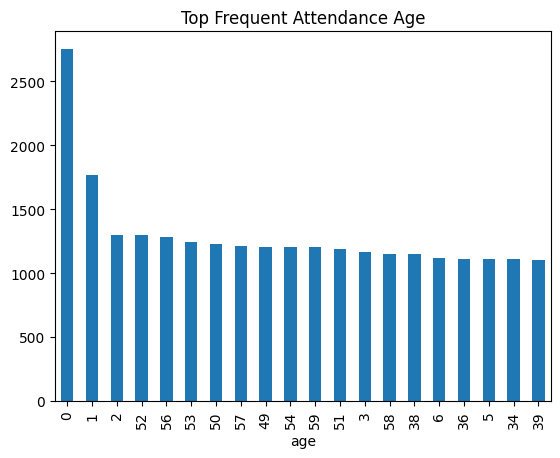

In [29]:
#Top Frequent Attendance Age
df.query('no_show=="No"').groupby('age')['gender'].count().sort_values(ascending=False).iloc[:20].plot(kind='bar',title='Top Frequent Attendance Age')

##### Plotting A Graph Between Overall,No Show & Attendance 

Text(0, 0.5, 'count')

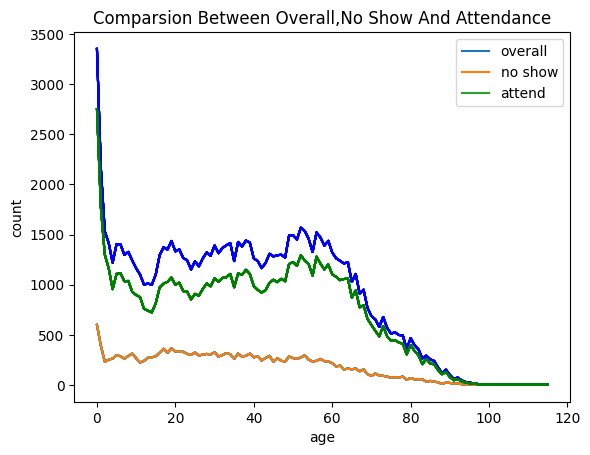

In [30]:

fig, ax = plt.subplots()
# labels={'N':'NO_Show','O':'Overall','A':'Attend'}
NO_SHOW=df.query('no_show=="Yes"').groupby('age').count()
OVERALL=df.groupby('age').count()
ATTEND=df.query('no_show=="No"').groupby('age').count()
plt.plot(NO_SHOW)
plt.plot(OVERALL,color='#0000FF')
plt.plot(ATTEND,color='g')
plt.title('Comparsion Between Overall,No Show And Attendance')
plt.legend(['overall','no show','attend'])
plt.xlabel('age')
plt.ylabel('count')


##### -From Graph We Notice That High Attendance For Babies(Below One Year Old)
##### -A Slightely Higher Area Between Attend And Overall Graph In Between 20:40 Year Old That Means A Relative Low Attendance 
##### -From 55 Year Old It Appears That The Area Between Overall And Attend Graph IS Decreasing Meaning A Higher Attendance In That Range    

#### Investigating The Data By Gender And Age four Quartiles

<AxesSubplot: xlabel='gender,no_show'>

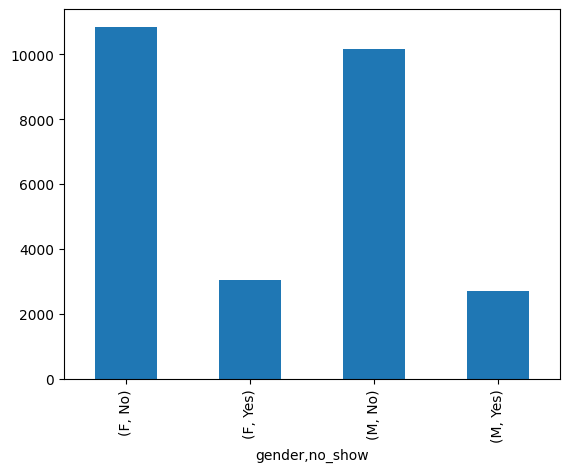

In [31]:
df.query('age<=18').groupby(['gender','no_show']).count()['age'].plot(kind='bar')

First Quartile Showes That The Count OF Males And Females Are Almost The Same On The Contrary For The Whole Data Set Females Were Almost Twice Males Numbers

<AxesSubplot: title={'center': 'Under 19 Overall Distribution'}, xlabel='gender,age'>

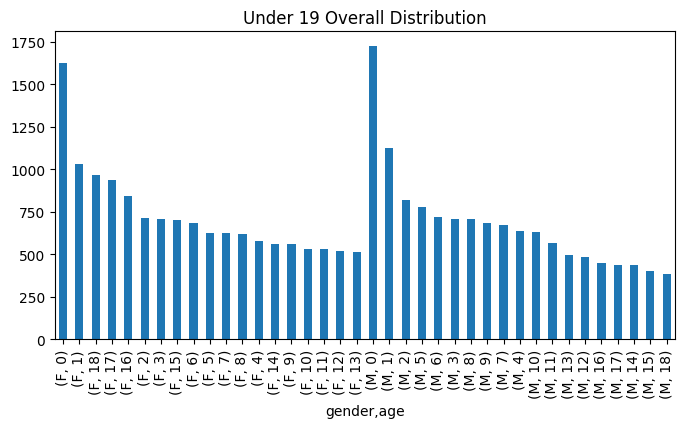

In [32]:
#Graph For Distribution Of Age Under 19 And Gender
df.query('age<=18').groupby('gender')['age'].value_counts().plot(kind='bar',title='Under 19 Overall Distribution',figsize=(8,4))

#### For Males The Distribution Is Right Skewed With Decresing Numbers As Age Increases
#### For Females Ages 18,17,16(Teen Age) Shows The Most Numbers Of Reservation After Years 1,2(baby Years)(It Perhabs Refer To Low Pregancy Age For Women )

Split By Gender And Filter By Attendance

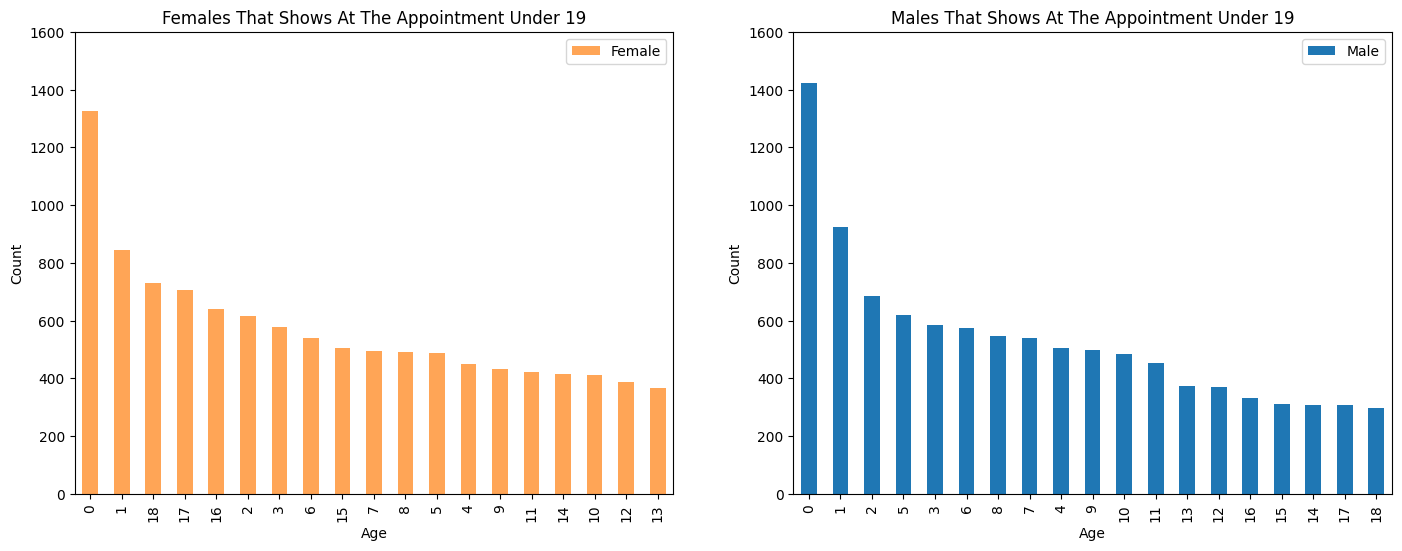

In [33]:
figure, ax = plt.subplots(1, 2,figsize=(17,6))
df.query('age<=18 & gender=="F" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Females That Shows At The Appointment Under 19',ax=ax[0],color='tab:orange',alpha=.7,label='Female')
df.query('age<=18 & gender=="M" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Males That Shows At The Appointment Under 19',ax=ax[1],label='Male')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_yticks(np.arange(0,1800,step=200))
ax[1].set_yticks(np.arange(0,1800,step=200))
ax[0].legend()
ax[1].legend()

#### Higher Attendance From 0 months To 1 Year Old In Both Graphs

Second Quartile

<AxesSubplot: title={'center': 'Gender And Attendace In Second Quartile'}, xlabel='gender,no_show'>

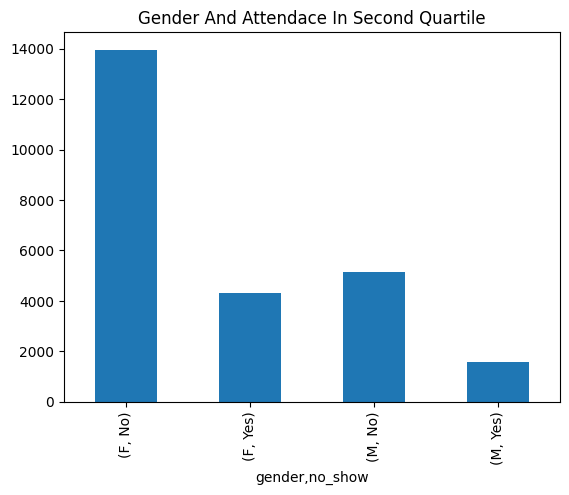

In [34]:
df.query('37>=age>18').groupby(['gender','no_show']).count()['age'].plot(kind='bar',title='Gender And Attendace In Second Quartile')


Higher Numbers For Females In Second Quartile

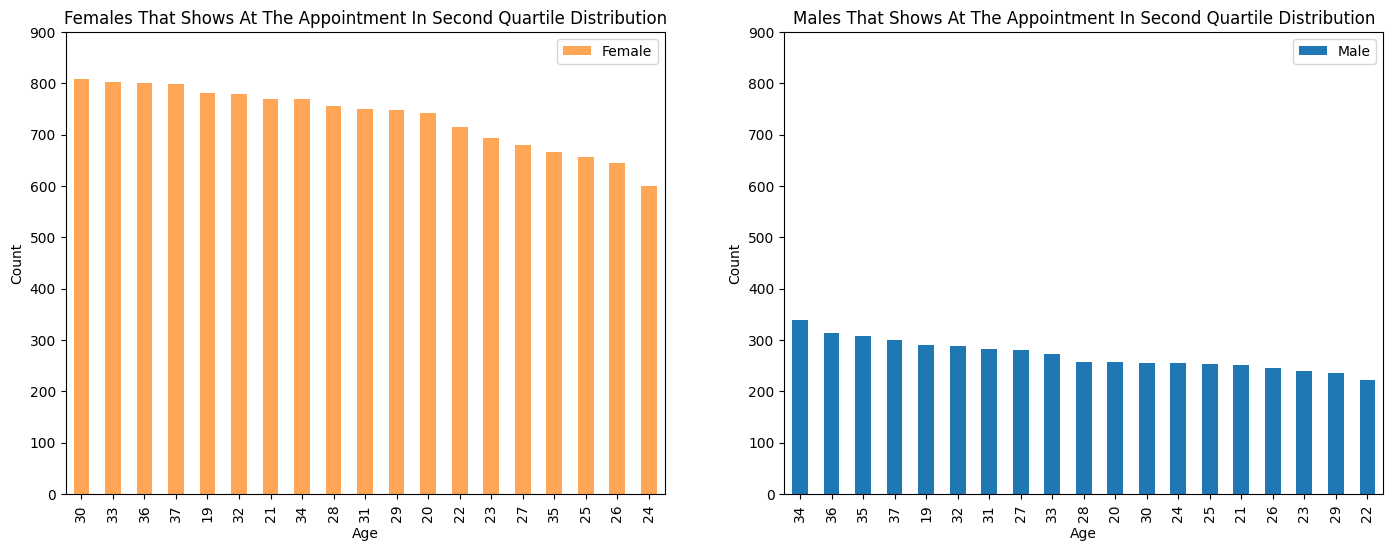

In [35]:
figure, ax = plt.subplots(1, 2,figsize=(17,6))
df.query('37>=age>18 & gender=="F" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Females That Shows At The Appointment In Second Quartile Distribution',ax=ax[0],color='tab:orange',alpha=.7,label='Female')
df.query('37>=age>18 & gender=="M" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Males That Shows At The Appointment In Second Quartile Distribution',ax=ax[1],label='Male')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_yticks(np.arange(0,1000,step=100))
ax[1].set_yticks(np.arange(0,1000,step=100))
ax[0].legend()
ax[1].legend()


##### -For Females Record Appearance Of Nearly 800 Across All Age Range Except For Mid Tweenties The Record Drop Slightely  To 650
##### -For Males A Higher Appearences In Mid Thirties

Third Quartile (Same Analysis)

<AxesSubplot: title={'center': 'Gender And Attendace In Third Quartile'}, xlabel='gender,no_show'>

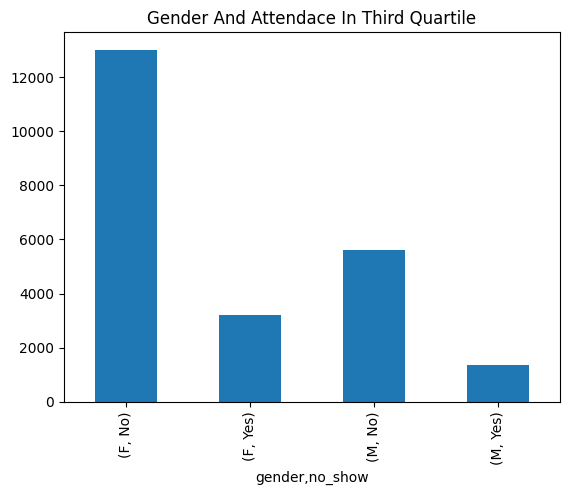

In [36]:
df.query('55>age>37').groupby(['gender','no_show']).count()['age'].plot(kind='bar',title='Gender And Attendace In Third Quartile')


Higher Numbers For Females In Third Quartile
Better Attendance Ratio For Males

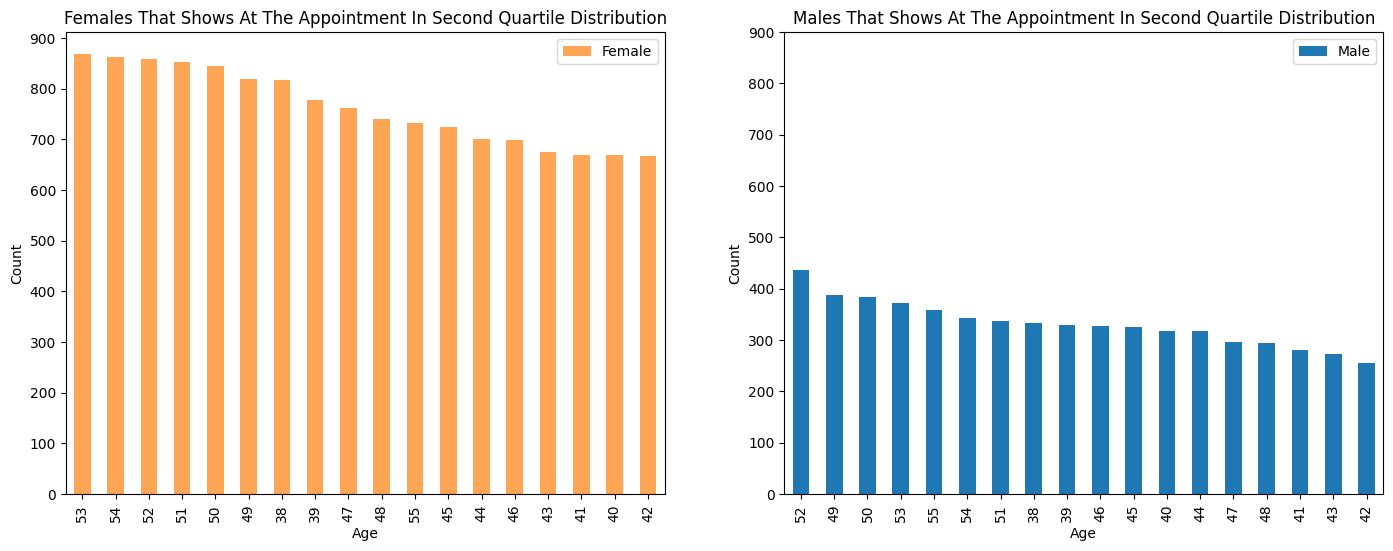

In [37]:
figure, ax = plt.subplots(1, 2,figsize=(17,6))
df.query('55>=age>37 & gender=="F" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Females That Shows At The Appointment In Second Quartile Distribution',ax=ax[0],color='tab:orange',alpha=.7,label='Female')
df.query('55>=age>37 & gender=="M" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Males That Shows At The Appointment In Second Quartile Distribution',ax=ax[1],label='Male')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_yticks(np.arange(0,1000,step=100))
ax[1].set_yticks(np.arange(0,1000,step=100))
ax[0].legend()
ax[1].legend()

##### -For Females Higher Appearences In The First Fifties , Last Forties And Last Thirties .Slightley Lower In First & Mid Forties
##### -For Males Higher Appearences At The Age Of 49 And First Fifties .Lower Appearences In First Forties 
##### -Males Have A Higher Appearences In Third Quartile Than Second .

Fourth Quartile (Same Analysis As The Previous Quartiles)

<AxesSubplot: title={'center': 'Gender And Attendace In Third Quartile'}, xlabel='gender,no_show'>

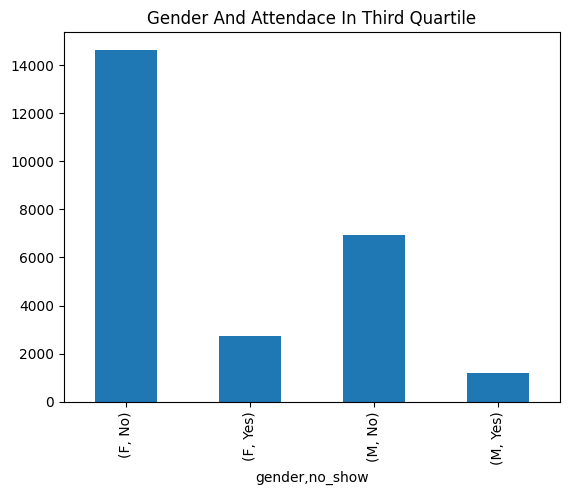

In [38]:
df.query('age>=56').groupby(['gender','no_show']).count()['age'].plot(kind='bar',title='Gender And Attendace In Third Quartile')


Better Attendance Ratio 

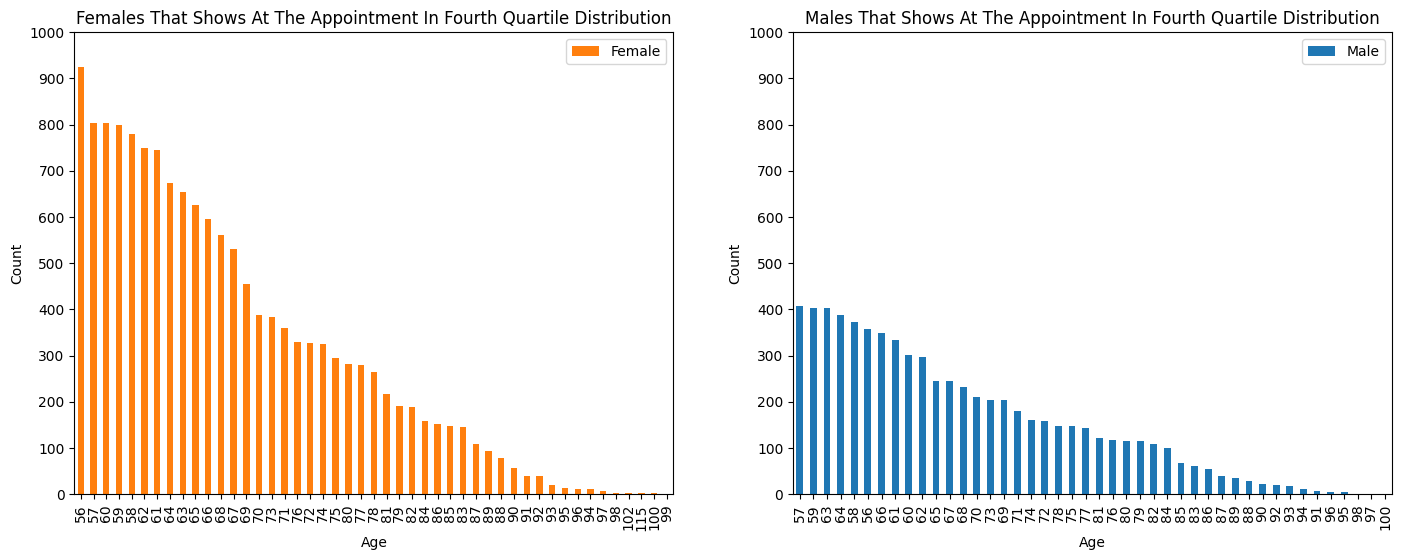

In [39]:
figure, ax = plt.subplots(1, 2,figsize=(17,6))
df.query('age>=56 & gender=="F" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Females That Shows At The Appointment In Fourth Quartile Distribution',ax=ax[0],color='tab:orange',label='Female')
df.query('age>=56 & gender=="M" & no_show=="No"')['age'].value_counts().plot(kind='bar',title='Males That Shows At The Appointment In Fourth Quartile Distribution',ax=ax[1],label='Male')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_yticks(np.arange(0,1100,step=100))
ax[1].set_yticks(np.arange(0,1100,step=100))
ax[0].legend()
ax[1].legend()

##### Higher Count And Age Range For Females(At Age 56 Females Has A Significant Appearences)


In [40]:
Q1=df.query('age<=18 & no_show=="No"')['age'].count()/df.query('age<=18 ')['age'].count()
Q2=df.query('38>=age>18 & no_show=="No"')['age'].count()/df.query('38>=age>18')['age'].count()
Q3=df.query('56>=age>38 & no_show=="No"')['age'].count()/df.query('56>=age>38')['age'].count()
Q4=df.query('age>=56 & no_show=="No"')['age'].count()/df.query('age>=56 ')['age'].count()
Q1,Q2,Q3,Q4



(0.7847159940209267, 0.7657957424282528, 0.8060635617329107, 0.845665464806396)

##### Third And Fourth Quartile Have A Better Attendence Ratio Compared To Second One As Higher Age Means Higher Attendance Ratio
##### First Quartile Most Of Attendance Are Babies

## Research Question 2(Is SMS Has A Remarkable Contribution In Attendance?)

Investigating Data For Sms Effect

<AxesSubplot: xlabel='sms_received,no_show'>

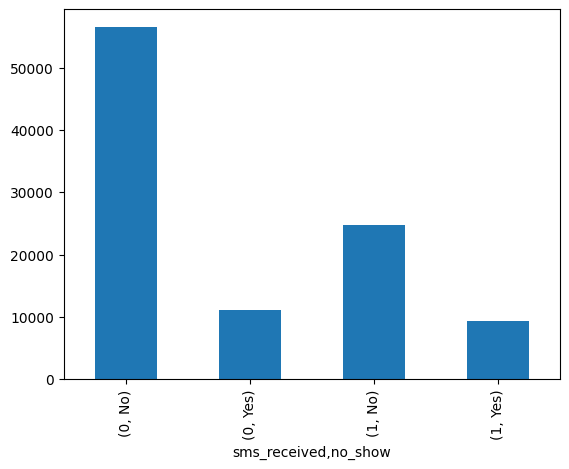

In [41]:
df.groupby(['sms_received','no_show'])['age'].count().plot(kind='bar')


In [42]:
df.query('diff=="0 days" & sms_received ==1')['sms_received'].count()

0

##### Since Recieving Sms AS A Reminder If An Appointment Is In The Same Day Of Scheduleing Won't Be Effective (Besides Maybe Reservation Occurs Immediate)  
##### Analysis Will Be Exclude Any Appointment Happened In The Same Day Of Scheduleing (in Order Not TO Effect The Investigation And Analysis)

Investigating Data Without Appointment Happened In The Same Schedueling Day

<AxesSubplot: xlabel='sms_received,no_show'>

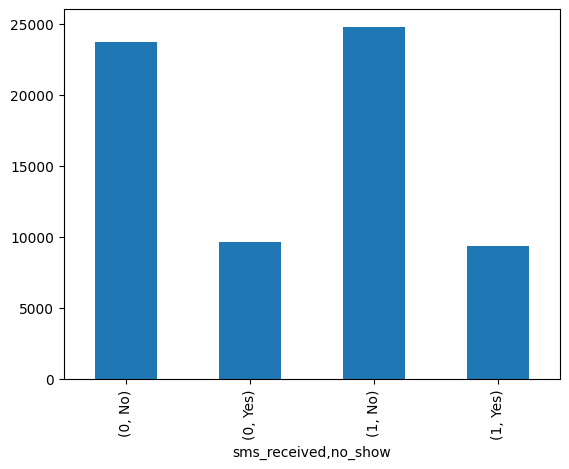

In [43]:
df.query('diff>"0 days" ').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar')

In [44]:
df.query('diff>"0 days" ').groupby(['sms_received','no_show'])['age'].describe()

count       mean        std  min   25%   50%   75%  \
sms_received no_show                                                         
0            No       23722.0  41.139617  23.701666  0.0  21.0  43.0  60.0   
             Yes       9652.0  35.568794  22.797158  0.0  17.0  34.0  53.0   
1            No       24803.0  38.847317  22.645171  0.0  20.0  40.0  57.0   
             Yes       9349.0  33.777195  21.037542  0.0  18.0  32.0  50.0   

                        max  
sms_received no_show         
0            No       102.0  
             Yes      115.0  
1            No       115.0  
             Yes       95.0

From The First Sight To The Graph Sms Has A Tiny Effect On Attendence .Further Analysis To Be Done To A Better Understanding

We Will Analysis Sms Effect After 1 day, 2 days ,4 days And 7 Days And We Will Divide The Analysis To Three Groups Age Lower Than 38(Median) ,Age Between 38 &56(Third Age Quartile) Age Higher Than 56(Fourth Age Quartile) As Maybe Using Phones Varies Between Age Ranges.

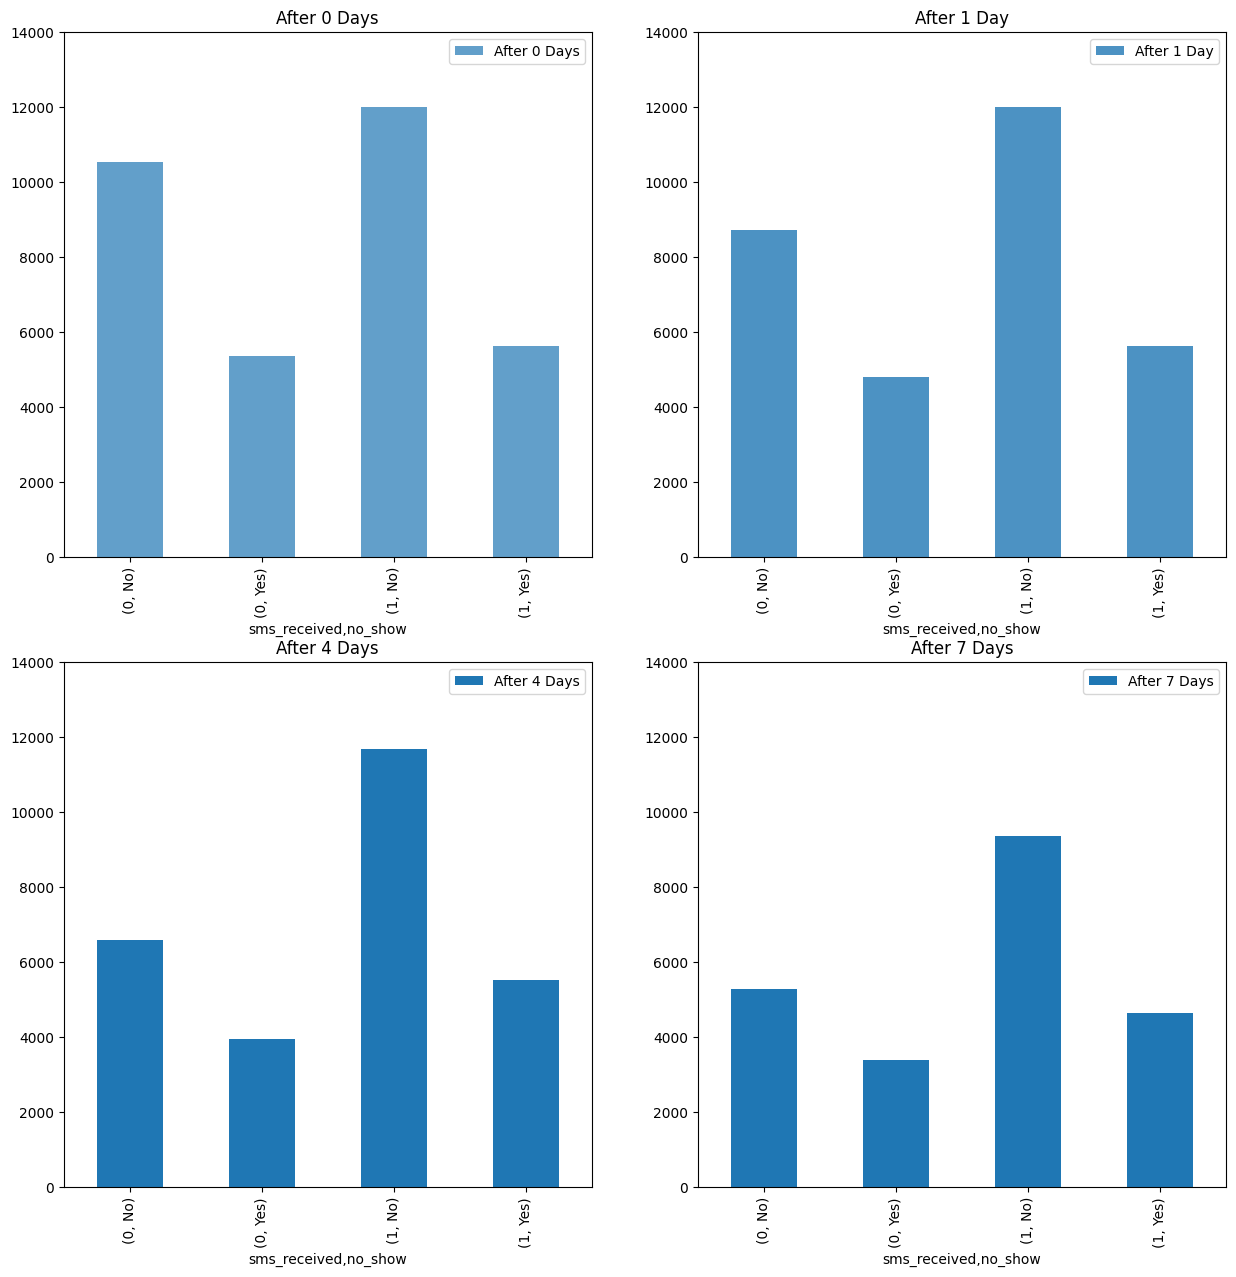

In [45]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
df.query('diff>"0 days" & 38>=age>=0').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,0],title='After 0 Days',alpha=.7,label='After 0 Days')
df.query('diff>"1 days" & 38>=age>=0').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,1],title='After 1 Day',alpha=.8,label='After 1 Day')
df.query('diff>="4 days" & 38>=age>=0').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,0],title='After 4 Days',label='After 4 Days')
df.query('diff>="7 days" & 38>=age>=0').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,1],title='After 7 Days',label='After 7 Days')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,1].set_yticks(np.arange(0,14300,step=2000))
ax[1,0].set_yticks(np.arange(0,14300,step=2000))
ax[0,1].set_yticks(np.arange(0,14300,step=2000))
ax[0,0].set_yticks(np.arange(0,14300,step=2000))
plt.show()



##### Graphs Shows That Sms Has A More Contribution In Attendance Especially For Appointments After 1,4 And 7 Days From The Sechdeuled Day.

Measuring The Effect By Increased Percentage Of Attendance TO

In [46]:
#Appointments After 2 Days 
(df.query('diff>="2 days" & 38>=age>=0 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="2 days" & 38>=age>=0 ').groupby('sms_received')['age'].count())*100

sms_received
0    64.561455
1    68.060987
Name: age, dtype: float64

In [47]:
#Appointments After 4 Days 
(df.query('diff>="4 days" & 38>=age>=0 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="4 days" & 38>=age>=0 ').groupby('sms_received')['age'].count())*100

sms_received
0    62.496440
1    67.874382
Name: age, dtype: float64

In [48]:
#Appointments After 7 Days 
(df.query('diff>="7 days" & 38>=age>=0 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="7 days" & 38>=age>=0 ').groupby('sms_received')['age'].count())*100

sms_received
0    60.829387
1    66.914339
Name: age, dtype: float64

##### -For More Than 2 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 3.5 Percent.
##### -For More Than 4 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 5.4 Percent.
##### -For More Than 7 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 6.1 Percent.

***Same Analysis For Ages from 38 to 56(Third Age Quartile) Year Old ***

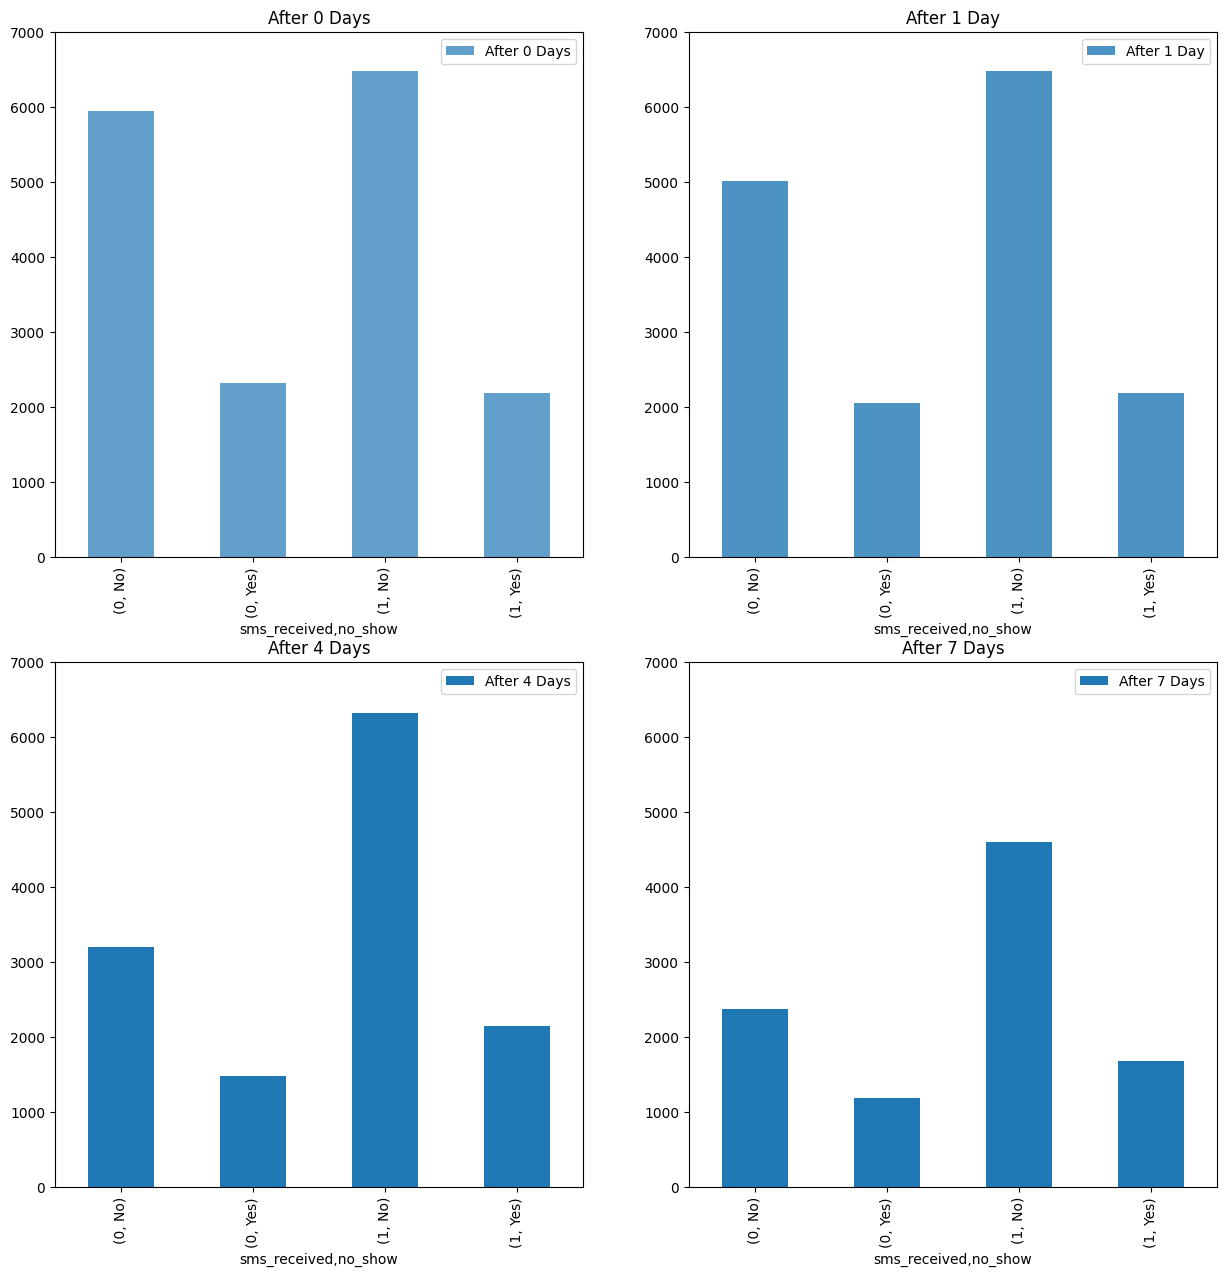

In [49]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
df.query('diff>"0 days" & 56>=age>38').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,0],title='After 0 Days',alpha=.7,label='After 0 Days')
df.query('diff>"1 days" & 56>=age>38').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,1],title='After 1 Day',alpha=.8,label='After 1 Day')
df.query('diff>="4 days" & 56>=age>38').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,0],title='After 4 Days',label='After 4 Days')
df.query('diff>="7 days" & 56>=age>38').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,1],title='After 7 Days',label='After 7 Days')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,1].set_yticks(np.arange(0,8000,step=1000))
ax[1,0].set_yticks(np.arange(0,8000,step=1000))
ax[0,1].set_yticks(np.arange(0,8000,step=1000))
ax[0,0].set_yticks(np.arange(0,8000,step=1000))
plt.show()


In [50]:
#Appointments After 2 Days 
(df.query('diff>="2 days" & 56>=age>38 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="2 days" & 56>=age>38 ').groupby('sms_received')['age'].count())*100

sms_received
0    70.881063
1    74.818150
Name: age, dtype: float64

In [51]:
#Appointments After 4 Days 
(df.query('diff>="4 days" &56>=age>38 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="4 days" & 56>=age>38 ').groupby('sms_received')['age'].count())*100

sms_received
0    68.281750
1    74.677858
Name: age, dtype: float64

In [52]:
#Appointments After 7 Days 
(df.query('diff>="7 days" & 56>=age>38 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="7 days" & 56>=age>38 ').groupby('sms_received')['age'].count())*100

sms_received
0    66.722973
1    73.207187
Name: age, dtype: float64

##### -For More Than 2 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 4 Percent.
##### -For More Than 4 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 6.4 Percent.
##### -For More Than 7 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 6.5 Percent.

***Same Analysis For Ages More Than 56Year Old (Fourth Age Quartile)***

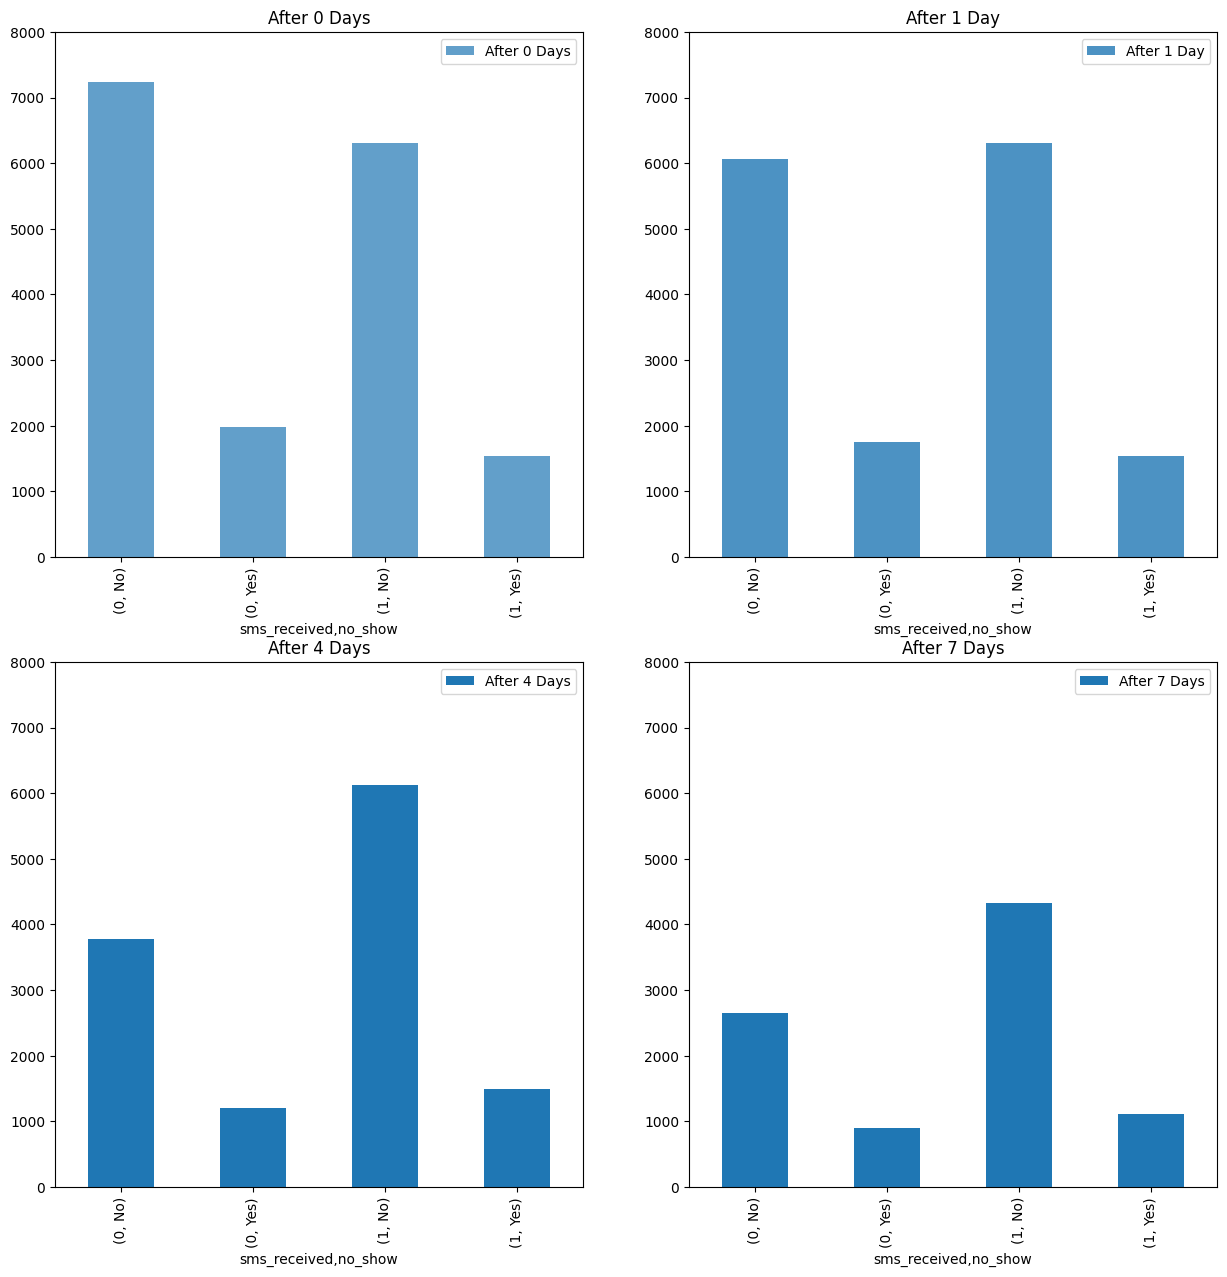

In [53]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
df.query('diff>"0 days" & age>56').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,0],title='After 0 Days',alpha=.7,label='After 0 Days')
df.query('diff>"1 days" & age>56').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[0,1],title='After 1 Day',alpha=.8,label='After 1 Day')
df.query('diff>="4 days" & age>56').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,0],title='After 4 Days',label='After 4 Days')
df.query('diff>="7 days" & age>56').groupby(['sms_received','no_show'])['age'].count().plot(kind='bar',ax=ax[1,1],title='After 7 Days',label='After 7 Days')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].set_yticks(np.arange(0,8500,step=1000))
ax[0,1].set_yticks(np.arange(0,8500,step=1000))
ax[1,0].set_yticks(np.arange(0,8500,step=1000))
ax[1,1].set_yticks(np.arange(0,8500,step=1000))
plt.show()


In [54]:
#Appointments After 2 Days 
(df.query('diff>="2 days" & age>56 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="2 days" & age>56 ').groupby('sms_received')['age'].count())*100

sms_received
0    77.614421
1    80.466361
Name: age, dtype: float64

In [55]:
#Appointments After 4 Days 
(df.query('diff>="4 days" &age>56 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="4 days" & age>56 ').groupby('sms_received')['age'].count())*100

sms_received
0    75.880105
1    80.351522
Name: age, dtype: float64

In [56]:
#Appointments After 7 Days 
(df.query('diff>="7 days" & age>56 & no_show=="No"').groupby('sms_received')['age'].count()/df.query('diff>="7 days" & age>56 ').groupby('sms_received')['age'].count())*100

sms_received
0    74.83780
1    79.60199
Name: age, dtype: float64

##### -For More Than 2 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 2.8 Percent.
##### -For More Than 4 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 4.5 Percent.
##### -For More Than 7 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By 4.8 Percent.
##### -For Age Older Than 56(Fourth Age Quartile) Sms Shows Less Increasing In Attendance Compared To Ages Below 56(First,Second & Third Age Quarile )

## Research Question 3  (Is There Is Specific Days That Has A Remarkable Increasing In Scheduleing Or No Show To The Appointment?  )

Creating A Dataframe For Diffrences Between Scheduled And Appointment Days More Than Zero(Scheduled And Appointment Not In The Same Day) For More Effective Analysis

In [57]:
df0=df.query('diff>"0 days"').reset_index(drop=True)

In [58]:
#Casual Investigation For The New Dataframe
df0.groupby('no_show').describe()

age                                                      \
           count       mean        std  min   25%   50%   75%    max   
no_show                                                                
No       48525.0  39.967934  23.195752  0.0  21.0  41.0  58.0  115.0   
Yes      19001.0  34.687280  21.966709  0.0  17.0  33.0  51.0  115.0   

        scholarship            ... sms_received        diff  \
              count      mean  ...          75%  max  count   
no_show                        ...                            
No          48525.0  0.083565  ...          1.0  1.0  48525   
Yes         19001.0  0.113520  ...          1.0  1.0  19001   

                                                                 \
                               mean                         std   
no_show                                                           
No       14 days 21:18:58.868624420  16 days 09:39:41.045635279   
Yes      17 days 02:01:33.595073943  16 days 15:23:14.403947469   

                                                                               \
                     min              25%               50%               75%   
no_show                                                                         
No       1 days 00:00:00  4 days 00:00:00   8 days 00:00:00  21 days 00:00:00   
Yes      1 days 00:00:00  5 days 00:00:00  13 days 00:00:00  25 days 00:00:00   

                            
                       max  
no_show                     
No       179 days 00:00:00  
Yes      179 days 00:00:00  

[2 rows x 64 columns]

Investigating No Show Percentage Through Week Days

In [59]:
df0.query('no_show=="Yes"').scheduled_day.dt.day_name().value_counts()/df0.scheduled_day.dt.day_name().value_counts()

Tuesday      0.283601
Wednesday    0.283259
Monday       0.282576
Friday       0.277783
Thursday     0.278421
Saturday     0.066667
Name: scheduled_day, dtype: float64

P.s.Saturday Has A Very Low Attendance | Scheduled That We Can Ignore It

In [60]:
df0.query('no_show=="Yes"').scheduled_day.dt.date.value_counts().head(10)

2016-04-26    772
2016-05-03    755
2016-04-28    704
2016-04-29    691
2016-05-02    682
2016-04-27    674
2016-04-25    668
2016-05-05    640
2016-05-16    613
2016-05-04    599
Name: scheduled_day, dtype: int64

Most Of The No show Days Looks Like They Are In The Same Week

In [61]:
df0.query('no_show=="No"').scheduled_day.dt.date.value_counts().head(10)

2016-04-29    1874
2016-04-28    1806
2016-05-05    1785
2016-05-16    1774
2016-05-03    1762
2016-05-02    1749
2016-05-10    1741
2016-05-09    1611
2016-04-27    1504
2016-04-26    1501
Name: scheduled_day, dtype: int64

Smae Again Most Of Attendance Appears To Be In The Same Weeks

***So We Will Convert The Date TO Week Number For Better Observations***

In [62]:
df0.query('no_show=="Yes"').scheduled_day.dt.isocalendar().week.value_counts()

17    3509
18    3225
19    2575
20    2344
22    1470
15    1396
16    1390
21     780
14     747
13     533
11     232
9      211
23     192
12     166
10     129
8       36
7       19
50      15
5        9
4        6
1        5
2        4
51       3
3        2
6        2
49       1
Name: week, dtype: Int64

In [63]:
df0.query('no_show=="No"').scheduled_day.dt.isocalendar().week.value_counts()

18    8165
17    7970
19    7207
20    6983
22    5031
16    2869
15    2572
21    2411
14    1564
13    1120
23     787
9      639
11     397
12     334
10     236
8       77
7       35
50      32
5       27
6       17
4       12
1       12
3       10
51      10
2        7
46       1
Name: week, dtype: Int64

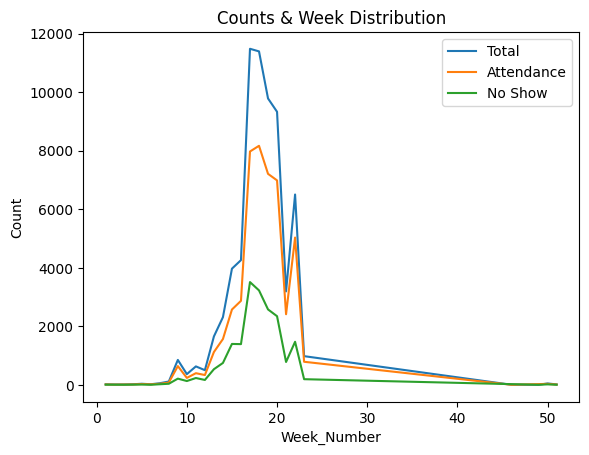

In [64]:
plt.plot(df0.scheduled_day.dt.isocalendar().week.value_counts().sort_index(),label='Total')
plt.plot(df0.query('no_show=="No"').scheduled_day.dt.isocalendar().week.value_counts().sort_index(),label='Attendance')
plt.plot(df0.query('no_show=="Yes"').scheduled_day.dt.isocalendar().week.value_counts().sort_index(),label='No Show')
plt.xlabel('Week_Number')
plt.ylabel('Count')
plt.title('Counts & Week Distribution')
plt.legend()

-Distrbution OF Total, Attendance & No Show In Weeks.\
-P.S. Weeks Number > 22 Belongs To The Year 2015.

##### Plotting 10 Major Weeks Percentage(Peak Weeks) 

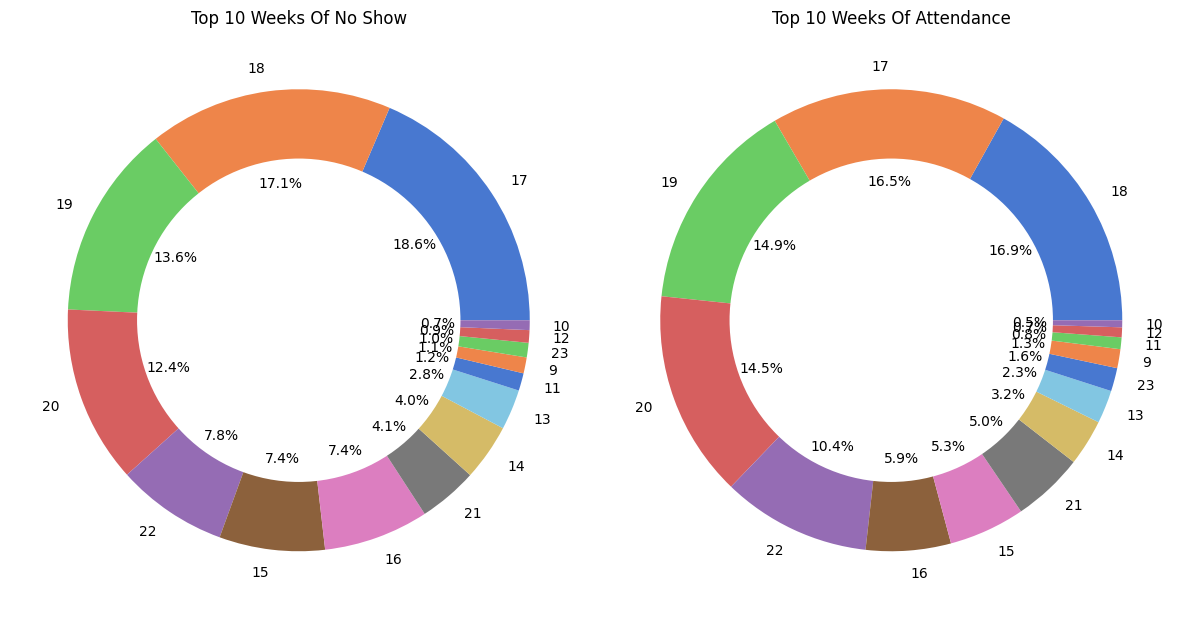

In [65]:
#plotting Top 10 Weeks Of No Show As They Are The Major Weeks
colors = sns.color_palette('muted')
fig,ax=plt.subplots(1,2,figsize=(12,12))
ax[0].pie(df0.query('no_show=="Yes"').scheduled_day.dt.isocalendar().week.value_counts().loc[:10],labels=df0.query('no_show=="Yes"').scheduled_day.dt.isocalendar().week.value_counts().loc[:10].index,colors=colors,autopct='%1.1f%%')
ax[0].set_title('Top 10 Weeks Of No Show')
#plotting Top 10 Weeks Of Attendance As They Are The Major Weeks
ax[1].pie(df0.query('no_show=="No"').scheduled_day.dt.isocalendar().week.value_counts().loc[:10],labels=df0.query('no_show=="No"').scheduled_day.dt.isocalendar().week.value_counts().loc[:10].index,colors=colors,autopct='%1.1f%%')
ax[1].set_title('Top 10 Weeks Of Attendance')
centre_circle1 = plt.Circle((0,0),0.70,fc='white')
fig1 = plt.gcf()
fig1.add_axes(ax[0]).add_artist(centre_circle1)
centre_circle2 = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.add_axes(ax[1]).add_artist(centre_circle2)
plt.tight_layout()
plt.show()
 


-Consecutive Weeks(17,18,19,20) Appears To Have The Most No Show\
-Same Weeks Appears In The Most Attendance Weeks

In [66]:
df0['diff'].describe()

count                         67526
mean     15 days 12:08:53.554482717
std      16 days 11:59:16.948137828
min                 1 days 00:00:00
25%                 4 days 00:00:00
50%                 9 days 00:00:00
75%                22 days 00:00:00
max               179 days 00:00:00
Name: diff, dtype: object

Analyse Average Waiting Days For Attendance And No-Show By Median(To Neglect the Few High Outliers Of Waiting Days )

In [67]:
#Making A Copy Of The Dataframe(Excluding Diff =0) 
df0_w=df0.copy()

In [68]:
#Convert Date To Week Number
df0_w.scheduled_day=df0_w.scheduled_day.dt.isocalendar().week

In [69]:
#Exploring The New Dataframe
df0_w.query('scheduled_day==17|scheduled_day==18|scheduled_day==19|scheduled_day==20').groupby('no_show')['diff'].count()

no_show
No     30325
Yes    11653
Name: diff, dtype: int64

In [70]:
#Getting Median For Attendance And No Show
df0_w.query('scheduled_day==17|scheduled_day==18|scheduled_day==19|scheduled_day==20').groupby('no_show')['diff'].median()

no_show
No    7 days
Yes   9 days
Name: diff, dtype: timedelta64[ns]

#### For Major Weeks(Peak Weeks)
##### -This Shows That Median Of Waiting Days For Attendance Is 7 Days & Median Of Wating Days For No Show Is 9 Days.
##### -With Searching The Internet For Brazil In 2016 There Was An Article By WHO(World Health Organizaton) That Talks About An Outbreak Of Zika Virous In Brazil And For The Symptoms They Mentioned It Lasts For 7 Days(That Could Explain Alot About Attendance Average Is Up To 7 Days-With In Symptoms Period- And A Higher Average For No Show) [Link_Of_Article](https://www.who.int/health-topics/zika-virus-disease#tab=tab_2)



***Creating Dataframe Excluding Peak Weeks(17,18,19,20) to Analyse***


In [71]:
drop_peak_weeks=df0_w[(df0_w['scheduled_day']==17)|(df0_w['scheduled_day']==18)|(df0_w['scheduled_day']==19)|(df0_w['scheduled_day']==20)].index

In [72]:
#Dropping Peak Weeks
new=df0_w.drop(drop_peak_weeks)

In [73]:
new.groupby('no_show')['diff'].count()

no_show
No     18200
Yes     7348
Name: diff, dtype: int64

In [74]:
new.groupby('no_show')['diff'].median()

no_show
No    15 days
Yes   23 days
Name: diff, dtype: timedelta64[ns]

-These Numbers Shows A Higher No Show For Higher Waiting Days

## Research Question 4 (Which Neighbourhoods Have The Best Attendance Percentage(Excluding Scheduleing And Appointment Happened In The Same Day)?)

Creating A Dataframe With Attendance Percentage Column, Median Age And Mean Of The Columns Data For Each Neighbourhood

In [75]:
d_c0=df0.neighbourhood.value_counts()
d_p0=(df0.query('no_show=="No"').groupby('neighbourhood')['age'].count()/df0.groupby('neighbourhood')['age'].count()).sort_values(ascending=False)

In [76]:
d_ag=df0.groupby('neighbourhood')['age'].mean().sort_values(ascending=False)
d_di=df0.groupby('neighbourhood')['diff'].median().sort_values(ascending=False)
d_s=df0.groupby('neighbourhood')['sms_received'].mean().sort_values(ascending=False)
d_scho=df0.groupby('neighbourhood')['scholarship'].mean().sort_values(ascending=False)
d_hib=df0.groupby('neighbourhood')['hypertension'].mean().sort_values(ascending=False)
d_han=df0.groupby('neighbourhood')['handcap'].mean().sort_values(ascending=False)
d_dia=df0.groupby('neighbourhood')['diabetes'].mean().sort_values(ascending=False)
d_alc=df0.groupby('neighbourhood')['alcoholism'].mean().sort_values(ascending=False)
d_no=(new.query('no_show=="No"').groupby('neighbourhood')['age'].count()/new.groupby('neighbourhood')['age'].count()).sort_values(ascending=False)

In [77]:
d_c0=pd.DataFrame(d_c0)
d_p0=pd.DataFrame(d_p0)
d_ag=pd.DataFrame(d_ag)
d_di=pd.DataFrame(d_di)
d_s=pd.DataFrame(d_s)
d_hib=pd.DataFrame(d_hib)
d_scho=pd.DataFrame(d_scho)
d_dia=pd.DataFrame(d_dia)
d_han=pd.DataFrame(d_han)
d_alc=pd.DataFrame(d_alc)
d_no=pd.DataFrame(d_no)


In [78]:
d_no.rename(columns={'age':'percentage_without_pw'},inplace=True)

In [79]:
df00=d_c0.join(d_p0,how='inner')

In [80]:
df00.rename(columns={'age':'percent_of_attendance','neighbourhood':'count'},inplace=True)

In [81]:
df00=df00.join([d_no,d_ag,d_di,d_s,d_scho,d_hib,d_alc,d_han,d_dia])

Plotting Top Twenty High Attendance Neighbourhood & Top Twenty Low Attendance Neighbourhood (Regardless Of Total Reservation Count
)

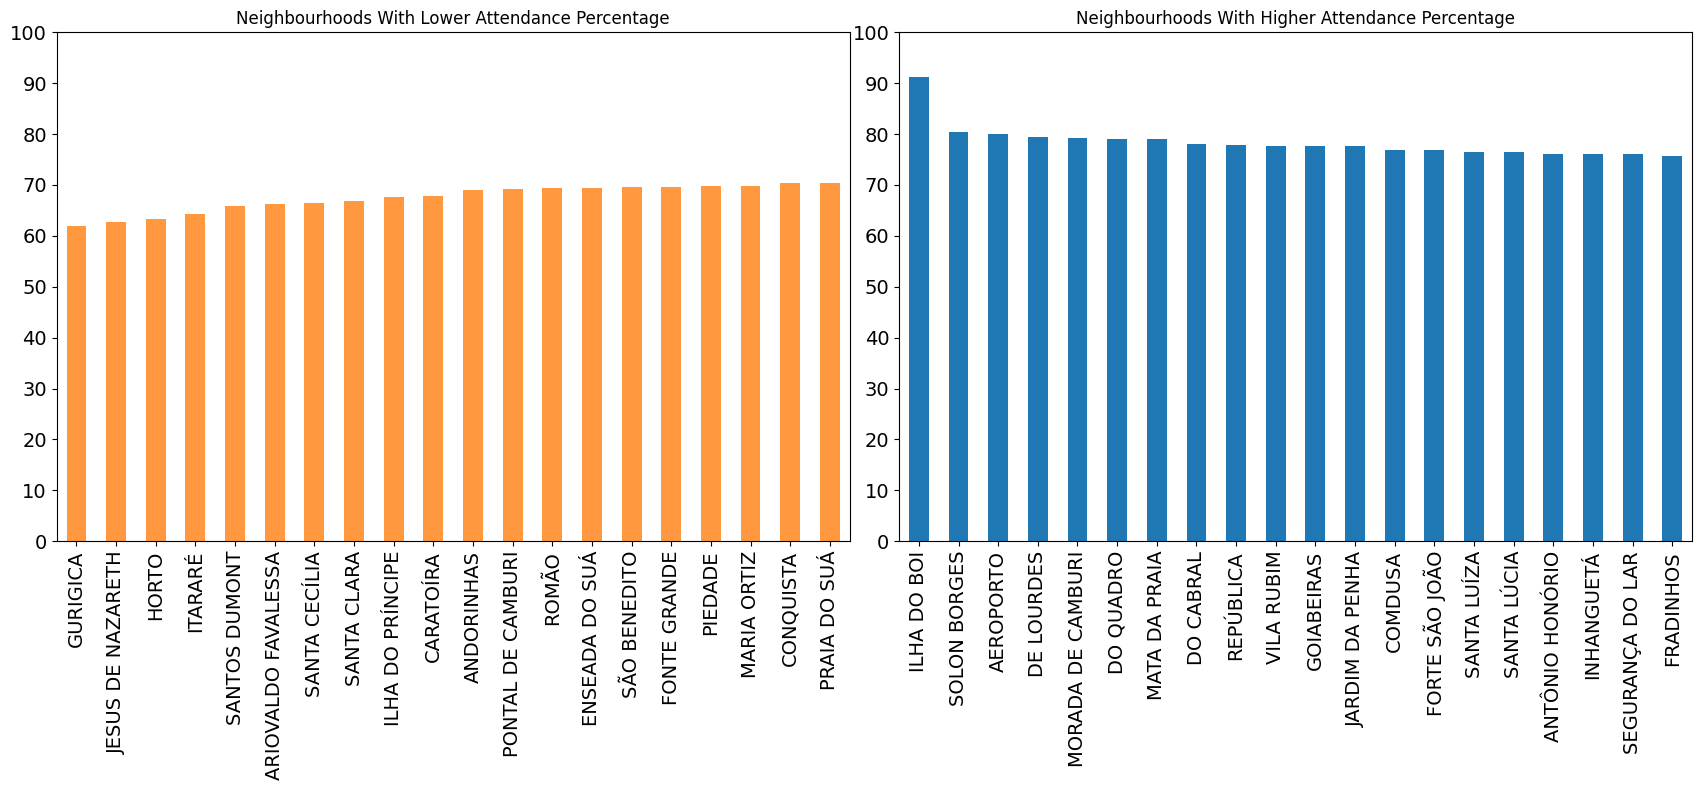

In [82]:
fig,ax=plt.subplots(1,2,figsize=(17,8))
(df00.sort_values(by='percent_of_attendance')['percent_of_attendance']*100).head(20).plot(kind='bar',title='Neighbourhoods With Lower Attendance Percentage',ax=ax[0],color='tab:orange',alpha=.8,fontsize=14)
(df00.sort_values(by='percent_of_attendance',ascending=False)['percent_of_attendance']*100).head(20).plot(kind='bar',title='Neighbourhoods With Higher Attendance Percentage',ax=ax[1],fontsize=14)
plt.tight_layout()
ax[0].set_yticks(np.arange(0,110,step=10))
ax[1].set_yticks(np.arange(0,110,step=10))
plt.show()


Plotting Attendance Percentage For Neighbourhoods With More Than 1000 Reservation (For More Effecient Analysis) 

In [83]:
df00.query('count>1000').sort_values(by='percent_of_attendance',ascending=False).shape

(27, 11)

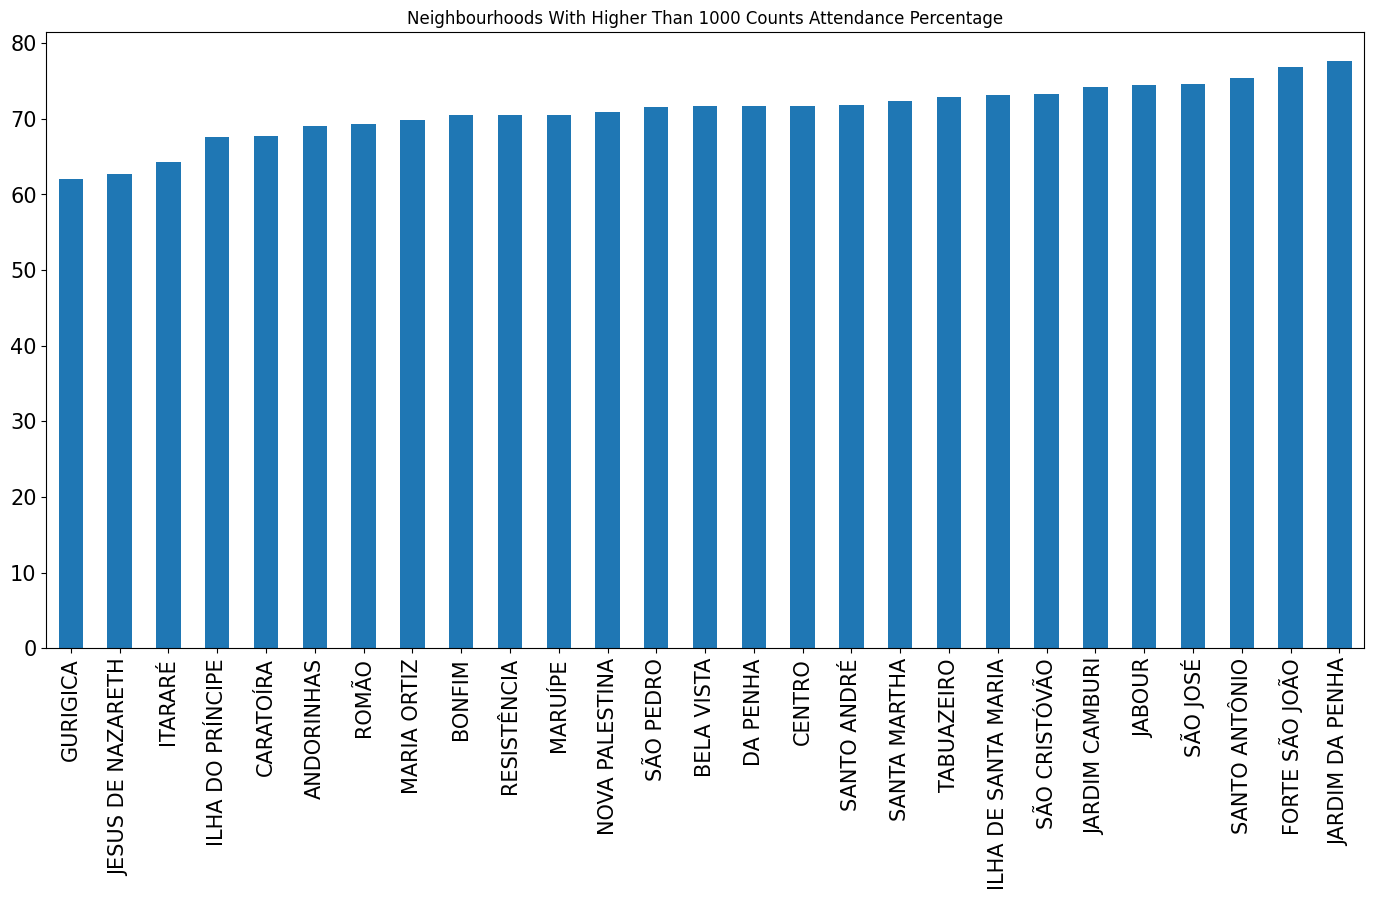

In [84]:
fig,ax=plt.subplots(figsize=(17,8))
(df00.query('count>1000').sort_values(by='percent_of_attendance')['percent_of_attendance']*100).plot(kind='bar',title='Neighbourhoods With Higher Than 1000 Counts Attendance Percentage',fontsize=15)
plt.show()


In [85]:
df00.query('count>1000').describe()

,count,percent_of_attendance,percentage_without_pw,age,diff,sms_received,scholarship,hypertension,alcoholism,handcap,diabetes
count,27.000000,27.000000,27.000000,27.000000,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1737.000000,0.710508,0.709652,37.601465,10 days 13:46:40,0.497737,0.100607,0.222228,0.028175,0.022372,0.079119
std,827.232411,0.038043,0.051279,4.167365,5 days 00:29:34.815738801,0.051688,0.058672,0.088052,0.019658,0.013047,0.034932
min,1053.000000,0.620133,0.573901,28.077852,6 days 00:00:00,0.325142,0.003940,0.021259,0.001380,0.000000,0.008071
25%,1271.000000,0.696105,0.677128,35.954295,7 days 00:00:00,0.473401,0.064956,0.199426,0.015356,0.016957,0.065578
50%,1486.000000,0.716446,0.715942,36.884335,8 days 00:00:00,0.507667,0.099225,0.249032,0.021403,0.021858,0.081281
75%,1741.500000,0.732386,0.740333,38.867154,12 days 18:00:00,0.528976,0.134049,0.281043,0.039940,0.030720,0.095694
max,4759.000000,0.775808,0.780303,47.769110,26 days 00:00:00,0.565157,0.244178,0.317547,0.079035,0.045301,0.141573


In [86]:
df00.query('count>1000').sort_values(by='percent_of_attendance',ascending=False).head()

,count,percent_of_attendance,percentage_without_pw,age,diff,sms_received,scholarship,hypertension,alcoholism,handcap,diabetes
JARDIM DA PENHA,2538,0.775808,0.777397,47.769110,16 days,0.544917,0.003940,0.290780,0.006698,0.020883,0.091805
FORTE SÃO JOÃO,1199,0.768974,0.717579,35.331943,6 days,0.479566,0.085905,0.203503,0.028357,0.009174,0.062552
SANTO ANTÔNIO,1550,0.754194,0.776163,40.667742,9 days,0.507742,0.045161,0.249032,0.017419,0.035484,0.087097
SÃO JOSÉ,1259,0.745830,0.743421,36.062748,6 days,0.505163,0.069897,0.293884,0.046863,0.045274,0.131056
JABOUR,1633,0.745254,0.731044,35.785058,21 days,0.552358,0.120024,0.033680,0.004287,0.000612,0.011023


In [87]:
df00.query('count>1000').sort_values(by='percent_of_attendance',ascending=False).tail()

,count,percent_of_attendance,percentage_without_pw,age,diff,sms_received,scholarship,hypertension,alcoholism,handcap,diabetes
CARATOÍRA,1587,0.677379,0.673653,40.137366,7 days,0.325142,0.170762,0.275362,0.032766,0.023314,0.090107
ILHA DO PRÍNCIPE,1417,0.676076,0.733850,36.770642,7 days,0.498236,0.244178,0.216655,0.014820,0.016937,0.051517
ITARARÉ,2196,0.643443,0.610891,36.884335,16 days,0.509107,0.079235,0.230419,0.021403,0.021858,0.079690
JESUS DE NAZARETH,1657,0.626433,0.573901,28.077852,16 days,0.459264,0.074834,0.155100,0.038624,0.016898,0.052505
GURIGICA,1053,0.620133,0.674419,32.295347,8 days,0.467236,0.206078,0.253561,0.035138,0.018044,0.097816


-For The Two Lowest Attendance Percentage Very Low Average Age Is Noticed\
-Higher Scholarship Average Than The Top Attendance.\
-For CARATOÍRA Although High Average Age But Very Low Average Sms Received And High Scholarship Average

**Analysis For Scholarship Percentage**

In [88]:
df.groupby('no_show')['scholarship'].mean()

no_show
No     0.093373
Yes    0.114718
Name: scholarship, dtype: float64

In [89]:
df0.groupby(['no_show'])['scholarship'].mean()

no_show
No     0.083565
Yes    0.113520
Name: scholarship, dtype: float64

In [90]:
new.groupby('no_show')['scholarship'].mean()

no_show
No     0.076538
Yes    0.100844
Name: scholarship, dtype: float64

-It's Noticed That Relatively Low Attendance For People With Scholarship

<a id='conclusions'></a>
## Conclusions
##### -Very High Attendance For Same Day Reservation(Difference Between Scheduled Day And Appointment Day Equal Zero).
##### -Baby Males And Females (Under Two Years) Shows A Significant High Attendance And Starting To Decrease Gradullay To The Age Of 15.
##### -For Females Ages 18,17,16(Teen Age) Shows The Most Numbers Of Reservation After Years 1,2(baby Years)(It Perhabs Refer To Low Pregancy Age For Women )
##### -Males Have A Relatively Higher Attendance In Mid Thirties Than Twenties.
##### -Females Have A Relative Low Apperances In Mid Tweenties Than Early , Late Tweenties And Thirties. 
##### -High Attendance For Fiftith Very Late Forties For Both Males And Females. 
##### -For Females Higher Appearences In The First Fifties , Last Forties And Last Thirties And Slightley Lower In First & Mid Forties.
##### -For Males Higher Appearences At The Age Of 49 And First Fifties .Lower Appearences In First Forties .
##### -Males Have A Higher Appearences In Third Quartile ( Age From 38 To 56) Than Second(Age From 18 To 38).
##### -Ages From 38 And Older Have A Better Attendence Ratio Compared To Younger Than 38 (Higher Age Means Higher Attendance Ratio).
##### -For More Than 2 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By Average Of 3 Percent.
##### -For More Than 4 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By Average Of 5 Percent.
##### -For More Than 7 Days Difference Between Appointment Day And Scheduled Day Sms Has Increased Attendance Percenatge By Average O 6 Percent.
##### -From Week 13 The Reservation Starting To Rapidly Increases To Score A Very High reservation In Weeks 17,18,19,20 (Peak Weeks).
#### For Major Weeks(Peak Weeks)
##### -This Shows That Median Of Waiting Days For Attendance Is 7 Days & Median Of Wating Days For No Show Is 9 Days.
##### -With Searching The Internet For Brazil In 2016 There Was An Article By WHO(World Health Organizaton) That Talks About An Outbreak Of Zika Virous In Brazil And For The Symptoms They Mentioned It Lasts For 7 Days(That Could Explain Alot About Attendance Average Is Up To 7 Days-With In Symptoms Period- And A Higher Average For No Show) [Link_Of_Article](https://www.who.int/health-topics/zika-virus-disease#tab=tab_2).
##### -It's Noticed That Relatively Low Attendance For People With Scholarship.
##### -For The Two Lowest Attendance Percentage Neighbourhoods With REservations More Than 1000(JESUS DE NAZARETH,GURIGICA) Very Low Average Age Is Noticed.
##### -For Neighbourhood CARATOÍRA Although High Average Age But Very Low Average Sms Received And High Scholarship Average.
##### -For Neighbourhoods With More Than 1000 Reservation JARDIM DA PENHA Is The Highest Attendance Percentage(It Has A Very High Average Age Of 47 Year Old)



 




In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset(no show appointment).ipynb'])

1